### Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
                          # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
!pip install pmdarima

In [3]:
from pmdarima import auto_arima

### Reading Data
The Data has Opening, Highest, Lowest and the Closing Prices of the Stock in every month. For this analysis, only Closing Stock Prices have been considered. 

In [5]:
data = pd.read_csv("YesBank_StockPrices.csv", usecols=["Date", "Close"])

In [6]:
data.head()

,Date,Close
0,Jul-05,12.46
1,Aug-05,13.42
2,Sep-05,13.30
3,Oct-05,12.99
4,Nov-05,13.41


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Close   185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [8]:
from datetime import datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [9]:
data.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


In [10]:
data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [11]:
ts = data.set_index('Date')

In [12]:
ts.index.freq = 'MS'

In [13]:
ts.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


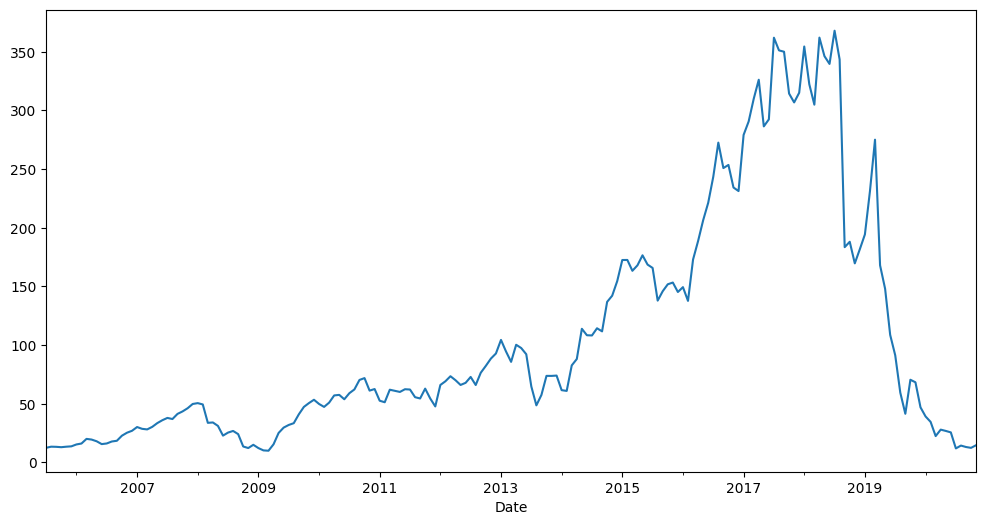

In [14]:
#plotting the data

ax = ts['Close'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)


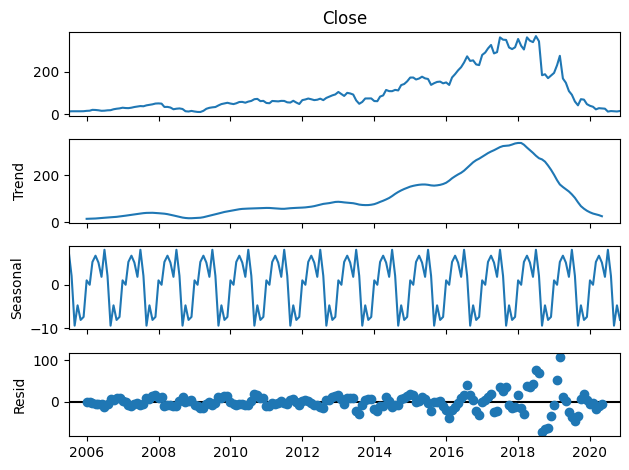

In [15]:
#TS Decomposition
result = seasonal_decompose(ts['Close'], model='add')
result.plot();

In [16]:
len(ts)

185

In [17]:
# Set two years for testing
train = ts.iloc[:162]
test = ts.iloc[162:]

In [18]:
test

,Close
Date,
2019-01-01,194.30
2019-02-01,231.20
2019-03-01,275.05
2019-04-01,168.00
2019-05-01,147.95
2019-06-01,108.70
2019-07-01,91.30
2019-08-01,59.50
2019-09-01,41.45


In [19]:
#Applying the Auto ARIMA Function
auto_arima(ts['Close'],m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -812.490
Date:                Wed, 31 Jul 2024   AIC                           1630.979
Time:                        21:48:43   BIC                           1640.624
Sample:                    07-01-2005   HQIC                          1634.888
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8165      0.049    -16.784      0.000      -0.912      -0.721
ma.L1          0.9483      0.025     38.149      0.000       0.900       0.997
sigma2       399.9167     17.929     22.305      0.000     364.776     435.058
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              3090.85
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              73.32   Skew:                            -2.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#statsmodel function implementation
model = SARIMAX(train['Close'],order=(1,1,1))
results = model.fit(maxiter=200)
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32611D+00    |proj g|=  3.00040D-02

At iterate    5    f=  4.32435D+00    |proj g|=  5.46281D-03

At iterate   10    f=  4.31978D+00    |proj g|=  1.02066D-02

At iterate   15    f=  4.31642D+00    |proj g|=  8.88362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   5.555D-06   4.316D+00
  F =   4.3164196459162198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  162
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -699.260
Date:                Wed, 31 Jul 2024   AIC                           1404.520
Time:                        21:48:45   BIC                           1413.764
Sample:                    07-01-2005   HQIC                          1408.273
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8875      0.079    -11.189      0.000      -1.043      -0.732
ma.L1          0.9695      0.036     26.646      0.000       0.898       1.041
sigma2       345.8068     15.081     22.930      0.000     316.248     375.365
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5529.42
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              60.41   Skew:                            -2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions')

In [22]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Close'][i]}")

predicted=189.0590448, expected=194.3
predicted=182.5723582, expected=231.2
predicted=188.3292121, expected=275.05
predicted=183.2200756, expected=168.0
predicted=187.7543709, expected=147.95
predicted=183.7302401, expected=108.7
predicted=187.3016063, expected=91.3
predicted=184.1320631, expected=59.5
predicted=186.9449934, expected=41.45
predicted=184.4485526, expected=70.45
predicted=186.6641128, expected=68.3
predicted=184.6978306, expected=46.95
predicted=186.4428817, expected=39.2
predicted=184.8941705, expected=34.55
predicted=186.2686325, expected=22.45
predicted=185.0488145, expected=27.95
predicted=186.1313879, expected=26.85
predicted=185.1706175, expected=25.6
predicted=186.0232893, expected=11.95
predicted=185.2665536, expected=14.37
predicted=185.9381471, expected=13.15
predicted=185.3421162, expected=12.42
predicted=185.8710863, expected=14.67


In [24]:
#Calcalutaing MSE
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], predictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 17585.44142


In [25]:
#Calculating RMSE
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'], predictions)
print(f'SARIMA RMSE Error: {error:11.10}')

SARIMA RMSE Error: 132.6101106


In [26]:
#Making Future Predictions of next year that is 2021
model = SARIMAX(ts['Close'],order=(1,1,1))
results = model.fit(maxiter=200)
fcast = results.predict(len(ts),len(ts)+11,typ='levels').rename('SARIMA Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41137D+00    |proj g|=  2.90799D-02

At iterate    5    f=  4.39297D+00    |proj g|=  2.82350D-03

At iterate   10    f=  4.39184D+00    |proj g|=  6.52278D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     16      1     0     0   6.523D-07   4.392D+00
  F =   4.3918357293474353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


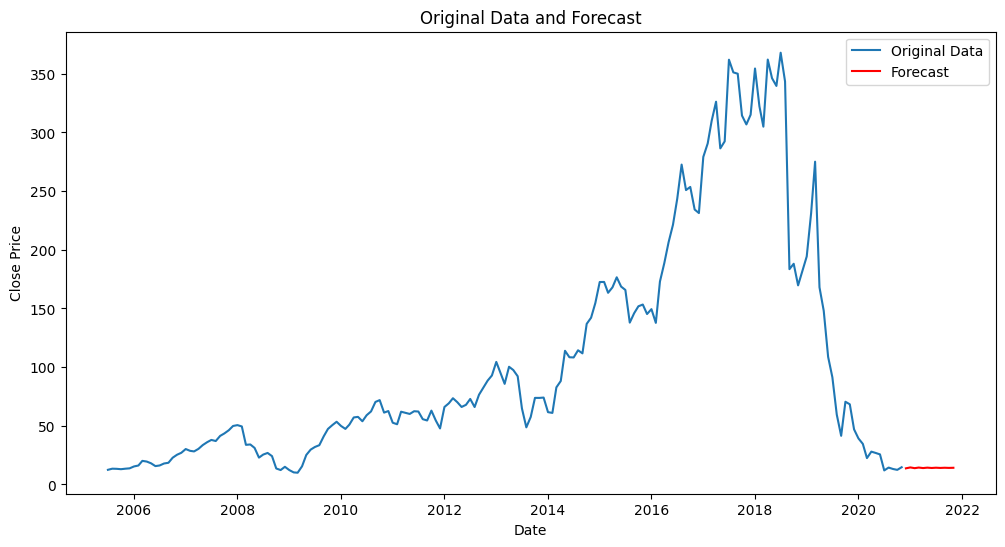

In [29]:
import matplotlib.pyplot as plt
# Plotting the original data
plt.figure(figsize=(12, 6))
plt.plot(ts['Close'], label='Original Data')

# Plotting the forecast data
plt.plot(fcast, label='Forecast', color='red')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data and Forecast')
plt.show()

### Model for 2017 as Test set

In [30]:
ts2017 = ts.iloc[:150]
train2017 = ts.iloc[:138]
test2017 = ts.iloc[138:150]

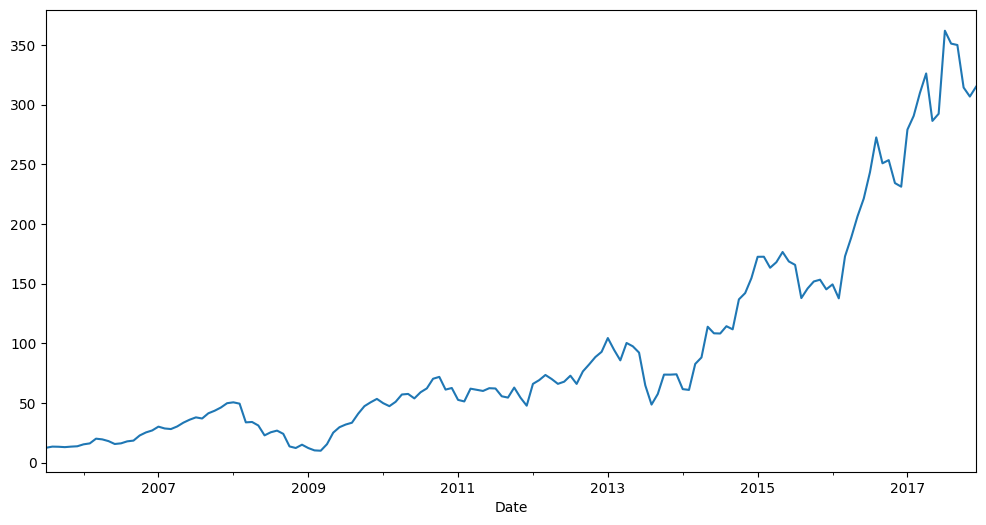

In [31]:
#plotting the data

ax = ts2017['Close'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)

In [32]:
test2017

,Close
Date,
2017-01-01,279.10
2017-02-01,290.56
2017-03-01,309.82
2017-04-01,326.14
2017-05-01,286.38
2017-06-01,292.37
2017-07-01,361.96
2017-08-01,351.15
2017-09-01,350.00


In [33]:
#Applying the Auto ARIMA Function
auto_arima(ts2017['Close'],m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.994
Date:                Wed, 31 Jul 2024   AIC                           1175.988
Time:                        21:50:21   BIC                           1181.996
Sample:                    07-01-2005   HQIC                          1178.429
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0308      1.079      1.883      0.060      -0.083       4.145
sigma2       152.5996      8.693     17.555      0.000     135.562     169.637
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               367.61
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              20.08   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#statsmodel function implementation
model2017 = SARIMAX(train2017['Close'],order=(0,1,0))
results2017 = model2017.fit(maxiter=200)
results2017.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64190D+00    |proj g|=  7.66789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.246D-07   3.642D+00
  F =   3.6418901967916373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  138
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -502.581
Date:                Wed, 31 Jul 2024   AIC                           1007.162
Time:                        21:50:21   BIC                           1010.082
Sample:                    07-01-2005   HQIC                          1008.348
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        89.9334      7.309     12.304      0.000      75.607     104.260
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):                34.07
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):              13.24   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Obtain predicted values
start2017=len(train2017)
end2017=len(train2017)+len(test2017)-1
predictions2017 = results2017.predict(start=start2017, end=end2017, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions 2017')

In [36]:
# Compare predictions to expected values
for i in range(len(predictions2017)):
    print(f"predicted={predictions2017[i]:<11.10}, expected={test2017['Close'][i]}")

predicted=231.26     , expected=279.1
predicted=231.26     , expected=290.56
predicted=231.26     , expected=309.82
predicted=231.26     , expected=326.14
predicted=231.26     , expected=286.38
predicted=231.26     , expected=292.37
predicted=231.26     , expected=361.96
predicted=231.26     , expected=351.15
predicted=231.26     , expected=350.0
predicted=231.26     , expected=314.35
predicted=231.26     , expected=306.8
predicted=231.26     , expected=315.05


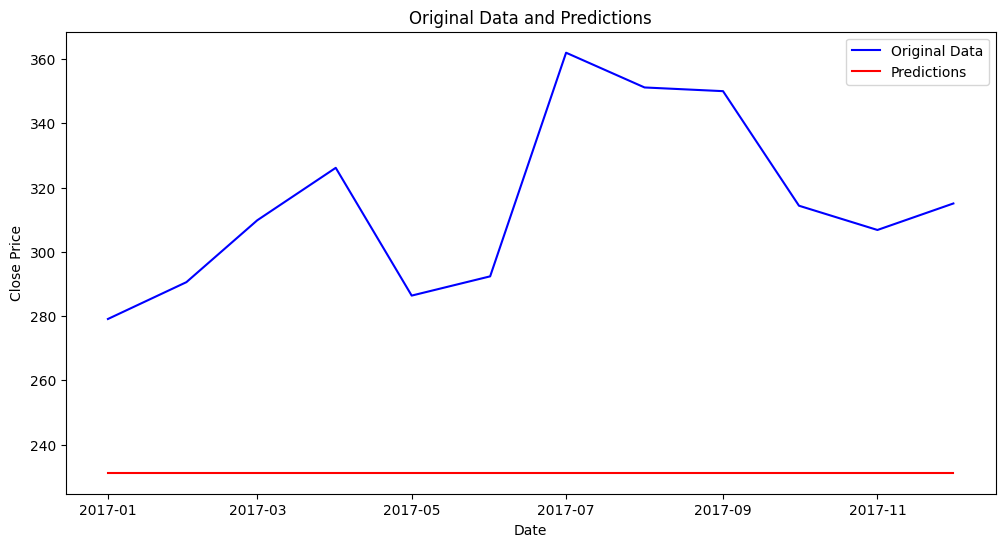

In [38]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(test2017['Close'], label='Original Data', color='blue')

# Plot the predictions
plt.plot(predictions2017, label='Predictions', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data and Predictions')
plt.legend()

# Show the plot
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2017['Close'], predictions2017)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 7744.831967


In [40]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


#apply adf test on the series
adf_test(ts2017['Close'])

#if test statistic < critical value, series is stationary
#series not stationary

Results of Dickey-Fuller Test:
Test Statistic                   0.430335
p-value                          0.982595
#Lags Used                       6.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


Text(0.5, 1.0, 'Stock Prices detrended by subtracting the trend component')

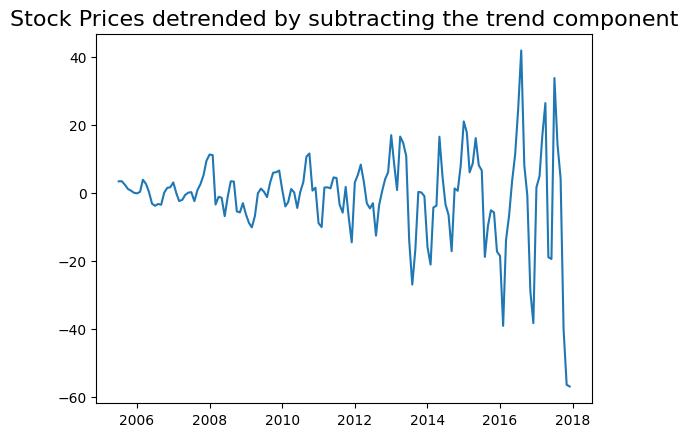

In [41]:
# Using statmodels: Subtracting the Trend Component.
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts2017['Close'], extrapolate_trend='freq')
detrended = ts2017.Close.values - res.trend
plt.plot(detrended)
plt.title('Stock Prices detrended by subtracting the trend component', fontsize=16)

In [42]:
detrended

Date
2005-07-01     3.384393
2005-08-01     3.424186
2005-09-01     2.383979
2005-10-01     1.153772
2005-11-01     0.653565
                ...    
2017-08-01    14.190391
2017-09-01     4.286888
2017-10-01   -40.116616
2017-11-01   -56.420120
2017-12-01   -56.923624
Freq: MS, Name: trend, Length: 150, dtype: float64

In [43]:
detrended =  pd.DataFrame(detrended)

In [44]:
adf_test(detrended.trend)

Results of Dickey-Fuller Test:
Test Statistic                  -5.548965
p-value                          0.000002
#Lags Used                       6.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [45]:
len(detrended)

150

In [46]:
# Set one year for testing
strain = detrended.iloc[:138]
stest = detrended.iloc[138:150]

In [47]:
stest

,trend
Date,
2017-01-01,1.638333
2017-02-01,4.885417
2017-03-01,16.739583
2017-04-01,26.393750
2017-05-01,-18.922500
2017-06-01,-19.445417
2017-07-01,33.753895
2017-08-01,14.190391
2017-09-01,4.286888


In [48]:
#SARIMA
auto_arima(detrended.trend,m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -552.339
Date:                Wed, 31 Jul 2024   AIC                           1118.678
Time:                        21:51:50   BIC                           1139.752
Sample:                    07-01-2005   HQIC                          1127.240
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.079      0.883      0.377      -0.085       0.224
ar.L2         -0.5735      0.079     -7.246      0.000      -0.729      -0.418
ar.L3          0.4321      0.051      8.534      0.000       0.333       0.531
ar.L4         -0.4346      0.103     -4.234      0.000      -0.636      -0.233
ma.L1          0.6965      0.051     13.629      0.000       0.596       0.797
ma.L2          0.9425      0.056     16.706      0.000       0.832       1.053
sigma2        90.6433      6.551     13.836      0.000      77.803     103.484
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               131.29
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
smodel = SARIMAX(detrended['trend'],order=(4,0,2))
sresults = smodel.fit(maxiter=200)
sresults.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08870D+00    |proj g|=  9.58591D-01

At iterate    5    f=  3.71351D+00    |proj g|=  1.44652D-02

At iterate   10    f=  3.70010D+00    |proj g|=  1.01305D-01

At iterate   15    f=  3.69154D+00    |proj g|=  3.82573D-02

At iterate   20    f=  3.68306D+00    |proj g|=  1.57984D-02

At iterate   25    f=  3.68244D+00    |proj g|=  4.12796D-03

At iterate   30    f=  3.68232D+00    |proj g|=  8.03499D-03

At iterate   35    f=  3.68226D+00    |proj g|=  1.79709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -552.339
Date:                Wed, 31 Jul 2024   AIC                           1118.678
Time:                        21:51:54   BIC                           1139.752
Sample:                    07-01-2005   HQIC                          1127.240
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.079      0.883      0.377      -0.085       0.224
ar.L2         -0.5735      0.079     -7.246      0.000      -0.729      -0.418
ar.L3          0.4321      0.051      8.534      0.000       0.333       0.531
ar.L4         -0.4346      0.103     -4.234      0.000      -0.636      -0.233
ma.L1          0.6965      0.051     13.629      0.000       0.596       0.797
ma.L2          0.9425      0.056     16.706      0.000       0.832       1.053
sigma2        90.6433      6.551     13.836      0.000      77.803     103.484
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               131.29
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Obtain predicted values
sstart=len(strain)
send=len(strain)+len(stest)-1
spredictions = sresults.predict(start=sstart, end=send, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions Detrended')

In [51]:
# Compare predictions to expected values
for i in range(len(spredictions)):
    print(f"predicted={spredictions[i]:<11.10}, expected={stest['trend'][i]}")

predicted=-16.32393822, expected=1.638333333333378
predicted=8.174457663, expected=4.885416666666686
predicted=10.08840523, expected=16.73958333333337
predicted=17.24922706, expected=26.39375000000001
predicted=6.272418205, expected=-18.922499999999957
predicted=-20.27062391, expected=-19.44541666666663
predicted=-9.544082791, expected=33.753895202020146
predicted=24.78472902, expected=14.190391414141345
predicted=14.88322698, expected=4.286887626262569
predicted=-2.169490772, expected=-40.11661616161621
predicted=-50.20290452, expected=-56.42011994949502
predicted=-25.32954716, expected=-56.923623737373816


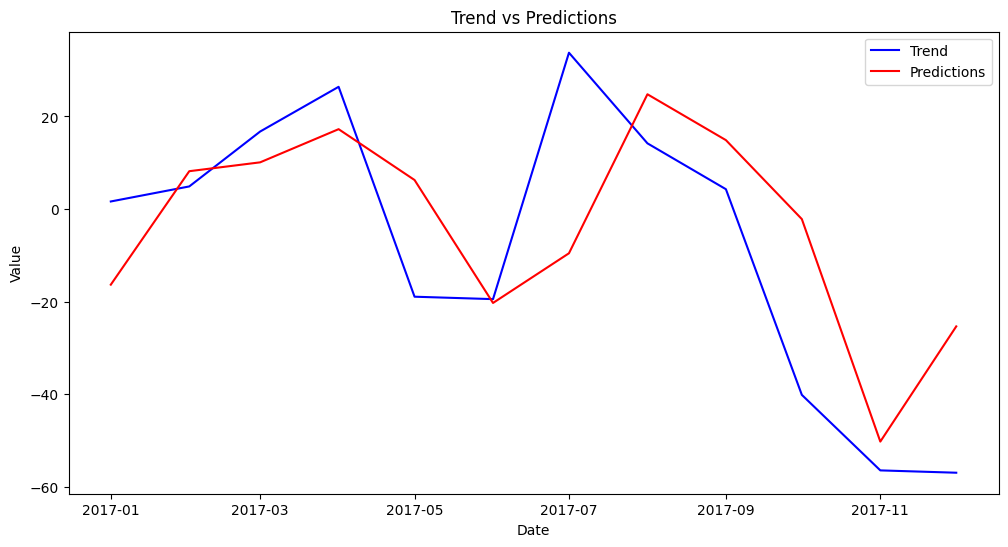

In [53]:
import matplotlib.pyplot as plt

# Plotting the trend data
plt.figure(figsize=(12, 6))
plt.plot(stest['trend'], label='Trend', color='blue')

# Plotting the predictions
plt.plot(spredictions, label='Predictions', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend vs Predictions')
plt.legend()

# Show the plot
plt.show()


In [54]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(stest['trend'], spredictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 472.7372828


In [55]:
res.trend

Date
2005-07-01      9.075607
2005-08-01      9.995814
2005-09-01     10.916021
2005-10-01     11.836228
2005-11-01     12.756435
                 ...    
2017-08-01    336.959609
2017-09-01    345.713112
2017-10-01    354.466616
2017-11-01    363.220120
2017-12-01    371.973624
Freq: MS, Name: trend, Length: 150, dtype: float64

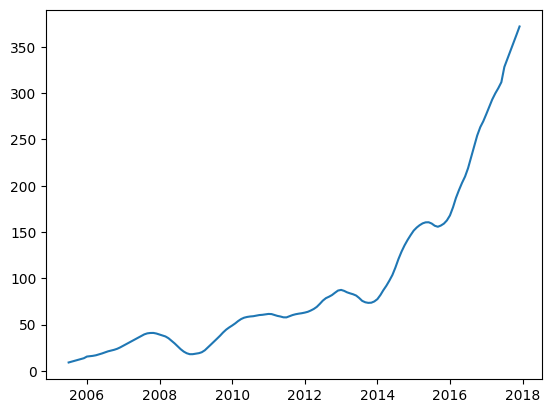

In [56]:
plt.plot(res.trend)

In [58]:
trendy = pd.DataFrame(res.trend)

In [59]:
#SARIMA
auto_arima(trendy.trend,m=12,seasonal = False, maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -256.762
Date:                Wed, 31 Jul 2024   AIC                            515.523
Time:                        21:52:43   BIC                            518.521
Sample:                    07-01-2005   HQIC                           516.741
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8811      0.062     30.156      0.000       1.759       2.003
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3150.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.45   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
# Set one year for testing
traint = trendy.iloc[:138]
testt = trendy.iloc[138:150]

In [61]:
modelt = SARIMAX(trendy['trend'],order=(0,2,0))
resultst = modelt.fit(maxiter=200)
resultst.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71179D+00    |proj g|=  9.78129D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   3.467D-07   1.712D+00
  F =   1.7117444600954446     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -256.762
Date:                Wed, 31 Jul 2024   AIC                            515.523
Time:                        21:52:48   BIC                            518.521
Sample:                    07-01-2005   HQIC                           516.741
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8811      0.062     30.156      0.000       1.759       2.003
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3150.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.45   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# Obtain predicted values
start=len(traint)
end=len(traint)+len(testt)-1
predictionst = resultst.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions')

In [63]:
# Compare predictions to expected values
for i in range(len(predictionst)):
    print(f"predicted={predictionst[i]:<11.10}, expected={testt['trend'][i]}")

predicted=275.85625  , expected=277.46166666666664
predicted=285.36125  , expected=285.6745833333333
predicted=293.8875   , expected=293.0804166666666
predicted=300.48625  , expected=299.74625
predicted=306.4120833, expected=305.30249999999995
predicted=310.85875  , expected=311.81541666666664
predicted=318.3283333, expected=328.20610479797983
predicted=344.5967929, expected=336.95960858585863
predicted=345.7131124, expected=345.71311237373743
predicted=354.4666162, expected=354.46661616161623
predicted=363.2201199, expected=363.22011994949503
predicted=371.9736237, expected=371.9736237373738


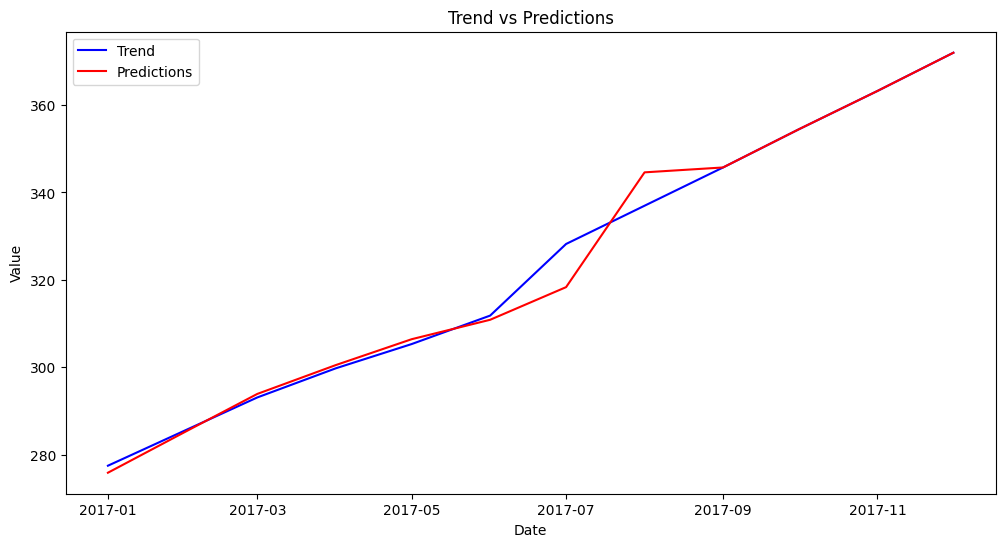

In [65]:
import matplotlib.pyplot as plt

# Plot the trend data
plt.figure(figsize=(12, 6))
plt.plot(testt['trend'], label='Trend', color='blue')

# Plot the predictions
plt.plot(predictionst, label='Predictions', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend vs Predictions')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [66]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testt['trend'], predictionst)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 13.49315534


In [67]:
 finalpreds = (predictionst + spredictions)

In [68]:
test2017

,Close
Date,
2017-01-01,279.10
2017-02-01,290.56
2017-03-01,309.82
2017-04-01,326.14
2017-05-01,286.38
2017-06-01,292.37
2017-07-01,361.96
2017-08-01,351.15
2017-09-01,350.00


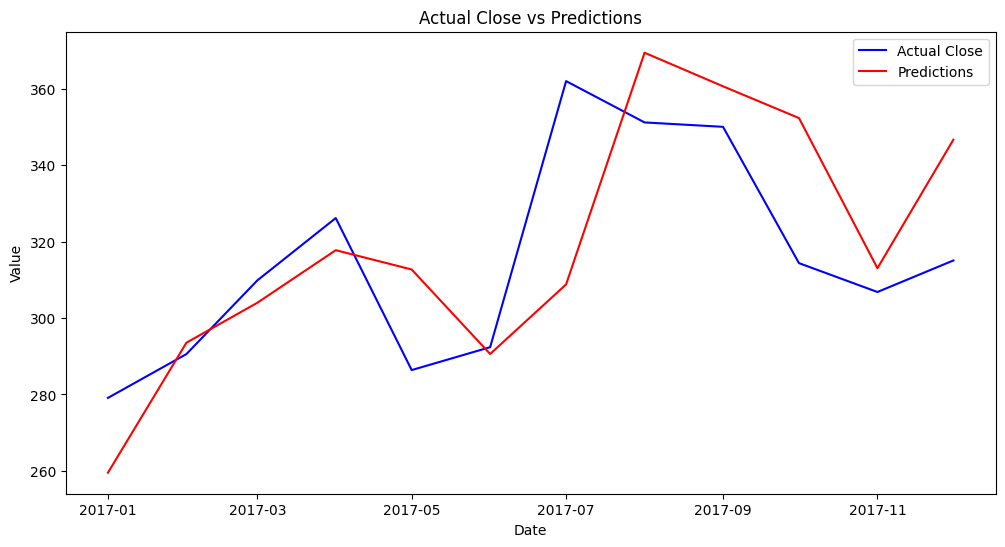

In [70]:
import seaborn as sns
import pandas as pd

# Prepare the data
df = pd.DataFrame({
    'Date': test2017.index,
    'Actual Close': test2017['Close'],
    'Predictions': finalpreds
})

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Actual Close', label='Actual Close', color='blue')
sns.lineplot(data=df, x='Date', y='Predictions', label='Predictions', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual Close vs Predictions')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [71]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2017['Close'], finalpreds)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 578.3996235
